Name:Christopher Sullivan
Project Title: Pokemon through the generations

This project takes a look at data regarding all the pokemon from generation 1-6. I've always loved pokemon and I decided that this would be more fun as opposed to something I am not as interested in. I used many things we've learned in the past to analyze different attributes of the pokemon in these generations.

Here is the link to the download for the csv file: https://www.kaggle.com/code/ash316/learn-pandas-with-pokemons/data?select=Pokemon.csv

All resources used:
    
    https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
    https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
    https://seaborn.pydata.org/examples/histogram_stacked.html
    https://seaborn.pydata.org/examples/horizontal_boxplot.html
    https://seaborn.pydata.org/examples/wide_form_violinplot.html

In [427]:
import csv
import pandas as pd

In [79]:
pokemon = pd.read_csv("pokemon.csv")

pokemon #Viewing the pokemon.csv file

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [399]:
pokemon[pokemon['Legendary']==True].head(20) #Seeing the first 20 pokemon that are legendaries

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


In [171]:
pokemon.sample(5) #Taking a random sample of 5 pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
485,437,Bronzong,Steel,Psychic,500,67,89,116,79,116,33,4,False
725,657,Frogadier,Water,NaN,405,54,63,52,83,56,97,6,False
740,672,Skiddo,Grass,NaN,350,66,65,48,62,57,52,6,False
694,633,Deino,Dark,Dragon,300,52,65,50,45,50,38,5,False
649,588,Karrablast,Bug,NaN,315,50,75,45,40,45,60,5,False


In [261]:
poke2 = pokemon.copy() #Creating copy of pokemon.csv

pd.options.mode.chained_assignment = None #https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

#Cleaning all Megas (There is a pokemon called "Meganium so have to make sure it isn't deleted")
for a in poke2["Name"]:
    if 'Mega' in a and a != "Meganium":
        poke2 = poke2.drop(poke2[(poke2["Name"] == a)].index)
        
#Cleaning primal forms
for a in poke2["Name"]:
    if "Primal" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"] == a)].index)
        
#Cleaning different Gourgeist and Pumpkaboo forms
for a in poke2["Name"]:
    if "Small" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

for a in poke2["Name"]:
    if "Large" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Super" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
# Cleaning the deoxys forms
for a in poke2["Name"]:
    if "Speed" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Defense" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Attack" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Cleaning Wormadam forms

for a in poke2["Name"]:
    if "Sandy" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Trash" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleaning rotom forms
for a in poke2["Name"]:
    if "Heat" in a and a != "Heatran" and a != "Heatmor":
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Wash" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "Frost" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

for a in poke2["Name"]:
    if "Mow" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

for a in poke2["Name"]:
    if "Fan" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Cleaning Giratina form
for a in poke2["Name"]:
    if "Origin" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleaning Shaymin form
for a in poke2["Name"]:
    if "Sky" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Cleaning Darmanitan form
for a in poke2["Name"]:
    if "Zen" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleans Landorus, Thundurus, and Tornadus forms
for a in poke2["Name"]:
    if "Therian" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleans Kyurem forms
for a in poke2["Name"]:
    if "Black" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
for a in poke2["Name"]:
    if "White" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleans Keldeo forms
for a in poke2["Name"]:
    if "Resolute" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleans Meloetta forms
for a in poke2["Name"]:
    if "Pirouette" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Cleans Meowstic form
for a in poke2["Name"]:
    if "Female" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)

#Cleans Aegislash form
for a in poke2["Name"]:
    if "Shield" in a and a != "Shieldon":
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Cleans Hoopa form

for a in poke2["Name"]:
    if "Unbound" in a:
        poke2 = poke2.drop(poke2[(poke2["Name"]== a)].index)
        
#Change NaN to a space to make interpreting easier
poke2["Type 2"] = poke2["Type 2"].fillna(" ")

#Resetting the index so it starts with
poke2 = poke2.reset_index() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

poke2 = poke2.drop(labels = ["index"], axis = 1) #Dropping the "index" column, as it is useless



#Simplifying Zygarde name
for b in poke2["Name"]:
    if b == "Zygarde50% Forme":
        poke2["Name"][717] = "Zygarde"

#Simplifying Hoopa name
for b in poke2["Name"]:
    if b == "HoopaHoopa Confined":
        poke2["Name"][719] = "Hoopa"
        
#Simplifying Pumpkaboo name
for b in poke2["Name"]:
    if b == "PumpkabooAverage Size":
        poke2["Name"][709] = "Pumpkaboo"

#Simpliyfying Gourgeist name
for b in poke2["Name"]:
    if b == "GourgeistAverage Size":
        poke2["Name"][710] = "Gourgeist"
        
#Simplifying Aegislash name
for b in poke2["Name"]:
    if b == "AegislashBlade Forme":
        poke2["Name"][680] = "Aegislash"
        
#Simplifying Meloetta name
for b in poke2["Name"]:
    if b == "MeloettaAria Forme":
        poke2["Name"][647] = "Meloetta"
        
#Simplifying Keldeo name
for b in poke2["Name"]:
    if b == "KeldeoOrdinary Forme":
        poke2["Name"][646] = "Keldeo"
        
#Simplifying Landorus, Thundurus, and Tornadus name
for b in poke2["Name"]:
    if b == "TornadusIncarnate Forme":
        poke2["Name"][640] = "Tornadus"
        
for b in poke2["Name"]:
    if b == "ThundurusIncarnate Forme":
        poke2["Name"][641] = "Thundurus"
        
for b in poke2["Name"]:
    if b == "LandorusIncarnate Forme":
        poke2["Name"][644] = "Landorus"
        
#Simplifing Meowstic name
for b in poke2["Name"]:
    if b == "MeowsticMale":
        poke2["Name"][677] = "Meowstic"
        
#Simplifying Darmanitan name
for b in poke2["Name"]:
    if b == "DarmanitanStandard Mode":
        poke2["Name"][554] = "Darmanitan"
        
#Simplifying Shaymin name
for b in poke2["Name"]:
    if b == "ShayminLand Forme":
        poke2["Name"][491] = "Shaymin"

#Simplifying Giratina name
for b in poke2["Name"]:
    if b == "GiratinaAltered Forme":
        poke2["Name"][486] = "Giratina"
        
#Simplifying Wormadam name
for b in poke2["Name"]:
    if b == "WormadamPlant Cloak":
        poke2["Name"][412] = "Wormadam"
        
#Simplifying Deoxys name
for b in poke2["Name"]:
    if b == "DeoxysNormal Forme":
        poke2["Name"][385] = "Deoxys"
        
#Now, all the data from pokemon generations 1-6 are cleaned and ready to use  
        
poke2

151


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,70,6,True


151


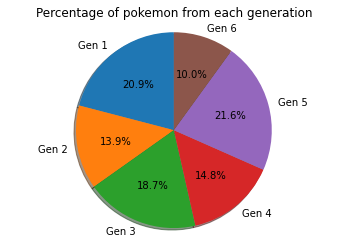

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

#To find percentage of pokemon from each generation
gen_1 = (151/721) *100

gen_2 = (100/721) * 100

gen_3 = (135/721) * 100

gen_4 = (107/721) * 100

gen_5 = (156/721) * 100

gen_6 = (72/721) * 100

#To make a pie graph of pokemon from each generation

labels = "Gen 1", "Gen 2", "Gen 3", "Gen 4", "Gen 5", "Gen 6"
distribution = [gen_1, gen_2, gen_3, gen_4, gen_5, gen_6]
explode = (0, 0, 0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(distribution, explode = explode, labels= labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')
plt.title("Percentage of pokemon from each generation")

plt.show()



66


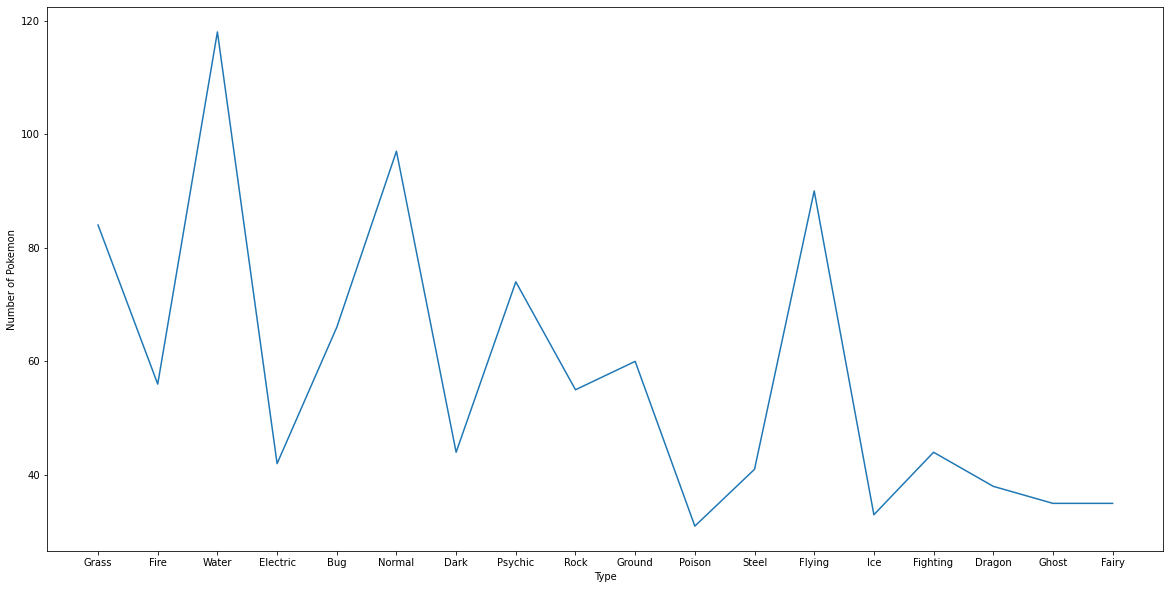

In [414]:
#Number of grass types
grass = 0
for i in poke2["Type 1"]:
    if i == "Grass":
        grass = grass + 1
for i in poke2["Type 2"]:
    if i == "Grass":
        grass = grass +1

#Number of water types
water = 0
for i in poke2["Type 1"]:
    if i == "Water":
        water = water + 1
for i in poke2["Type 2"]:
    if i == "Water":
        water = water +1

#Number of fire types
fire = 0
for i in poke2["Type 1"]:
    if i == "Fire":
        fire = fire + 1
for i in poke2["Type 2"]:
    if i == "Fire":
        fire = fire +1

#Number of dragon types
dragon = 0
for i in poke2["Type 1"]:
    if i == "Dragon":
        dragon = dragon + 1
for i in poke2["Type 2"]:
    if i == "Dragon":
        dragon = dragon +1

#Number of psychic types
psychic = 0
for i in poke2["Type 1"]:
    if i == "Psychic":
        psychic = psychic + 1
for i in poke2["Type 2"]:
    if i == "Psychic":
        psychic = psychic +1

#Number of dark types
dark = 0
for i in poke2["Type 1"]:
    if i == "Dark":
        dark = dark + 1
for i in poke2["Type 2"]:
    if i == "Dark":
        dark = dark +1

#Number of fighting types
fighting = 0
for i in poke2["Type 1"]:
    if i == "Fighting":
        fighting = fighting + 1
for i in poke2["Type 2"]:
    if i == "Fighting":
        fighting = fighting +1

#Number of flying types
flying = 0
for i in poke2["Type 1"]:
    if i == "Flying":
        flying = flying + 1
for i in poke2["Type 2"]:
    if i == "Flying":
        flying = flying +1

#Number of rock types
rock = 0
for i in poke2["Type 1"]:
    if i == "Rock":
        rock = rock + 1
for i in poke2["Type 2"]:
    if i == "Rock":
        rock = rock +1

#Number of ground types
ground = 0
for i in poke2["Type 1"]:
    if i == "Ground":
        ground = ground + 1
for i in poke2["Type 2"]:
    if i == "Ground":
        ground = ground +1

#Number of ghost types
ghost = 0
for i in poke2["Type 1"]:
    if i == "Ghost":
        ghost = ghost + 1
for i in poke2["Type 2"]:
    if i == "Ghost":
        ghost = ghost +1

#Number of bug types
bug = 0
for i in poke2["Type 1"]:
    if i == "Bug":
        bug = bug + 1
for i in poke2["Type 2"]:
    if i == "Bug":
        bug = bug +1

#Number of ice types
ice = 0
for i in poke2["Type 1"]:
    if i == "Ice":
        ice = ice + 1
for i in poke2["Type 2"]:
    if i == "Ice":
        ice = ice +1

#Number of steel types
steel = 0
for i in poke2["Type 1"]:
    if i == "Steel":
        steel = steel + 1
for i in poke2["Type 2"]:
    if i == "Steel":
        steel = steel +1

#Number of fairy types
fairy = 0
for i in poke2["Type 1"]:
    if i == "Fairy":
        fairy = fairy + 1
for i in poke2["Type 2"]:
    if i == "Fairy":
        fairy = fairy +1

#Number of electric types
electric = 0
for i in poke2["Type 1"]:
    if i == "Electric":
        electric = electric + 1
for i in poke2["Type 2"]:
    if i == "Electric":
        electric = electric +1

#Number of normal types
normal = 0
for i in poke2["Type 1"]:
    if i == "Normal":
        normal = normal + 1
for i in poke2["Type 2"]:
    if i == "Normal":
        normal = normal +1

#Number of poison types
poison = 0
for i in poke2["Type 1"]:
    if i == "WPoison":
        poison = poison + 1
for i in poke2["Type 2"]:
    if i == "Poison":
        poison = poison +1

#Making a line graph of type distribution of all pokemon
x_axis = ["Grass", "Fire", "Water", "Electric", "Bug", "Normal", "Dark", "Psychic", "Rock", "Ground",
"Poison", "Steel", "Flying", "Ice", "Fighting", "Dragon", "Ghost", "Fairy"]
y_axis = [grass, fire, water, electric, bug, normal, dark, psychic, rock, ground, 
               poison, steel, flying, ice, fighting, dragon, ghost, fairy]
 

f = plt.figure()
f.set_figwidth(20) #Adjusting graph size
f.set_figheight(10)
plt.xlabel("Type")
plt.ylabel("Number of Pokemon")
plt.plot(x_axis,y_axis) #https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/
plt.show()

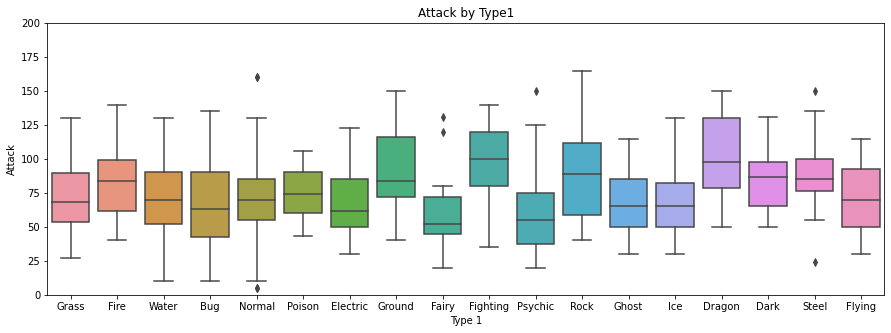

In [300]:
#Box plot, showing which type has the strongest attack stat (Type 1)
#https://seaborn.pydata.org/examples/horizontal_boxplot.html

plt.subplots(figsize = (15,5))
plt.title('Attack by Type1')
sns.boxplot(x = "Type 1", y = "Attack",data = poke2)
plt.ylim(0,200)
plt.show()

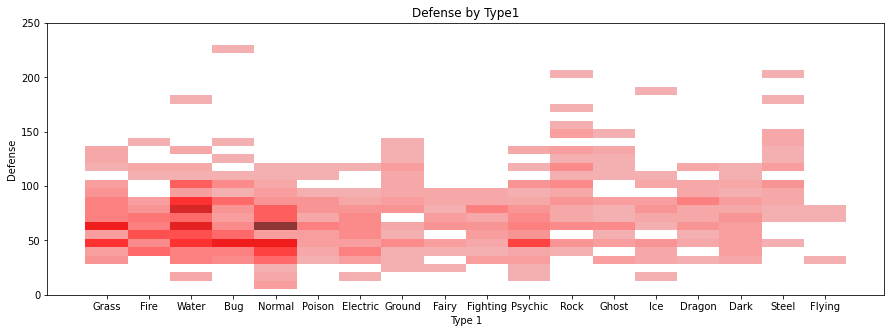

In [315]:
#Making a histogram to show the types with the highest and lowest defense
#https://seaborn.pydata.org/examples/histogram_stacked.html

plt.subplots(figsize = (15,5))
plt.title('Defense by Type1')
sns.histplot(x = "Type 1", y = "Defense",data = poke2, color = 'r') #https://stackoverflow.com/questions/58432235/changing-color-of-seaborn-plot-line
plt.ylim(0,250)
plt.show()

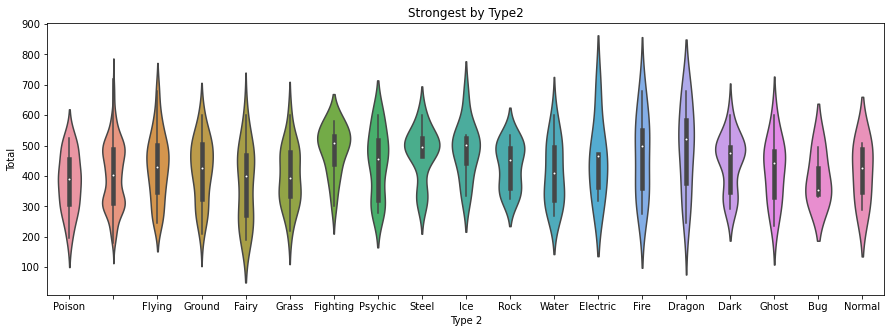

In [449]:
#Violin plot, showing which type has the strongest attack stat (Type 1)
#https://seaborn.pydata.org/examples/wide_form_violinplot.html

plt.subplots(figsize = (15,5))
plt.title('Strongest by Type2')
sns.violinplot(x = "Type 2", y = "Total",data = poke2)
plt.show()

In [451]:
#Dictionary of pokemon and their corresponding speed for generation 1

def speed_gen_1(pokemon):

    generation_1 = {}

    name_1 = poke2["Name"][0:151]

    speed_1 = poke2["Speed"][0:151]

    m= 0

    for i in name_1:
        generation_1[i] = speed_1[m]
        m= m +1

    print(f' The speed of {pokemon} is {generation_1[pokemon]}!')
    
speed_gen_1("Charizard")
    


#Dictionary of pokemon and their corresponding speed for generation 2

def speed_gen_2(pokemon):

    generation_2 = {}

    name_2 = poke2["Name"][151:251]

    speed_2 = poke2["Speed"][151:251]

    n= 151

    for i in name_2:
        generation_2[i] = speed_2[n]
        n= n +1

    print(f' The speed of {pokemon} is {generation_2[pokemon]}!')
    
    
speed_gen_2("Celebi")

#Dictionary of pokemon and their corresponding speed for generation 3

def speed_gen_3(pokemon):

    generation_3 = {}

    name_3 = poke2["Name"][251:386]

    speed_3 = poke2["Speed"][251:386]

    p= 251

    for i in name_3:
        generation_3[i] = speed_3[p]
        p= p +1

    print(f' The speed of {pokemon} is {generation_3[pokemon]}!')
    
    
speed_gen_3("Treecko")

#Dictionary of pokemon and their corresponding speed for generation 4

def speed_gen_4(pokemon):

    generation_4 = {}

    name_4 = poke2["Name"][386:493]

    speed_4 = poke2["Speed"][386:493]

    w= 386

    for i in name_4:
        generation_4[i] = speed_4[w]
        w= w +1

    print(f' The speed of {pokemon} is {generation_4[pokemon]}!')
    
    
speed_gen_4("Turtwig")

#Dictionary of pokemon and their corresponding speed for generation 5

def speed_gen_5(pokemon):

    generation_5 = {}

    name_5 = poke2["Name"][493:649]

    speed_5 = poke2["Speed"][493:649]

    q= 493

    for i in name_5:
        generation_5[i] = speed_5[q]
        q= q +1

    print(f' The speed of {pokemon} is {generation_5[pokemon]}!')
    
    
speed_gen_5("Snivy")

#Dictionary of pokemon and their corresponding speed for generation 6

def speed_gen_6(pokemon):

    generation_6 = {}

    name_6 = poke2["Name"][649:722]

    speed_6 = poke2["Speed"][649:722]

    r= 649

    for i in name_6:
        generation_6[i] = speed_6[r]
        r= r +1

    print(f' The speed of {pokemon} is {generation_6[pokemon]}!')
    
    
speed_gen_6("Chespin")

poke2.loc[5]

 The speed of Charizard is 100!
 The speed of Celebi is 100!
 The speed of Treecko is 70!
 The speed of Turtwig is 31!
 The speed of Snivy is 63!
 The speed of Chespin is 38!


#                     6
Name          Charizard
Type 1             Fire
Type 2           Flying
Total               534
HP                   78
Attack               84
Defense              78
Sp. Atk             109
Sp. Def              85
Speed               100
Generation            1
Legendary         False
Name: 5, dtype: object

46
675


<BarContainer object of 2 artists>

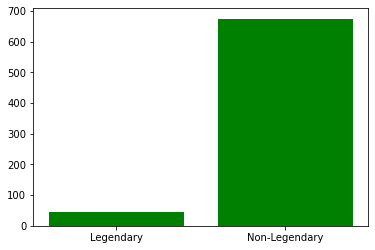

In [425]:
#Code for Bar graph seeing distribution of legendaries vs non-legendaries

#Seeing number of legendaries
legendary = 0
for j in poke2["Legendary"]:
    if j == True:
        legendary = legendary +1

print(legendary)

#Seeing number of non-legendaries
nonlegendary = 0
for j in poke2["Legendary"]:
    if j == False:
        nonlegendary = nonlegendary +1     
        
print(nonlegendary)
        
#Creating the bar graph itself (Fairly simple)

x = ["Legendary", "Non-Legendary"]
y= [46, 675]

plt.bar(x, y, color = 'g')


In [452]:
#Using OOP to determine the length of each pokemon's name

class Pokemon:
    def __init__ (self, name):
        self.name = name
    def choose(self):
        print("You picked " + self.name + "!")
    def namelength(self):
        return len(self.name)
    
pokedex_num= 681  #Enter the actual number of the pokedex here (You can find the pokedex number of a pokemon online)
    
p1 = Pokemon(poke2["Name"][pokedex_num - 1])
p1.choose()
print (f'{poke2["Name"][pokedex_num - 1]} has {str(p1.namelength())} letters!')




You picked Aegislash!
Aegislash has 9 letters!


This project was very fun to work on. In the future, I may want to use data with the 3 more generations that were added since then, and also with pokemon abilities, which were not included in this dataset.